In [8]:
import pandas as pd
from collections import deque
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint, ModelCheckpoint
import time
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
from sklearn import preprocessing
%matplotlib inline 

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [44]:
df=pd.read_csv("/content/gdrive/My Drive/Desktop/crypto_data/coin_Bitcoin.csv")
df1=pd.read_csv("/content/gdrive/My Drive/Desktop/crypto_data/coin_Dogecoin.csv")

df3=pd.read_csv("/content/gdrive/My Drive/Desktop/crypto_data/coin_Litecoin.csv")


df['Date'] = pd.to_datetime(df['Date']).dt.date
df1['Date'] = pd.to_datetime(df1['Date']).dt.date

df3['Date'] = pd.to_datetime(df3['Date']).dt.date

df.set_index("Date", inplace=True)
df=df[["Close"]]
df.dropna(inplace=True)


df1.set_index("Date", inplace=True)
df1=df1[["Close"]]
df1.dropna(inplace=True)




df3.set_index("Date", inplace=True)
df3=df3[["Close"]]
df3.dropna(inplace=True)



Text(0.5, 1.0, 'Price coin_Bitcoin')

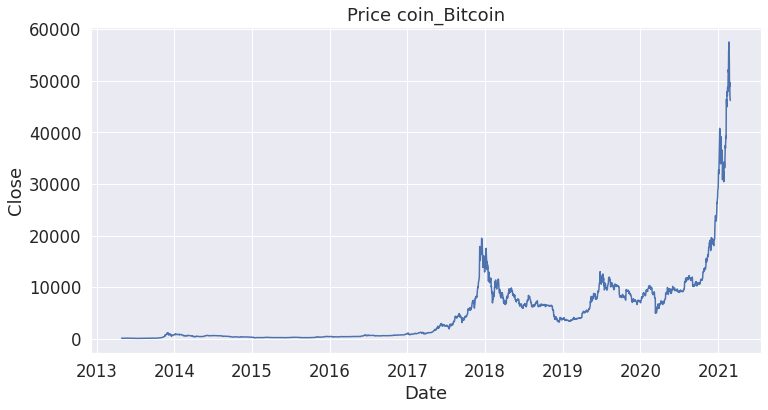

In [45]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y="Close", data=df).set_title("Price coin_Bitcoin")


Text(0.5, 1.0, 'Price coin_Dogecoin')

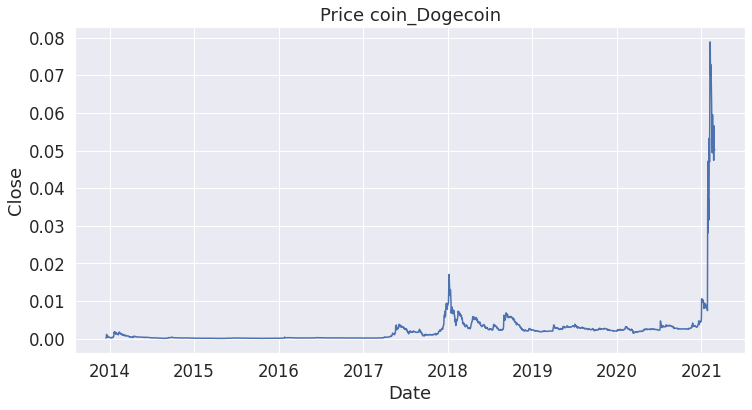

In [46]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df1.index, y="Close", data=df1).set_title("Price coin_Dogecoin")


Text(0.5, 1.0, 'Price coin_Litecoin')

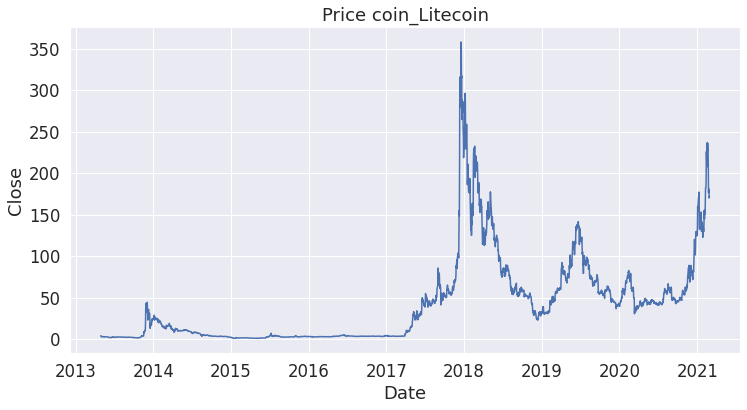

In [47]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df3.index, y="Close", data=df3).set_title("Price coin_Litecoin")

In [48]:
data = df.iloc[:, 0]
hist = []
target = []
length = 150
for i in range(len(data)-length):
    x = data[i:i+length]
    y = data[i+length]
    hist.append(x)
    target.append(y)

In [49]:
data1 = df1.iloc[:, 0]
hist1 = []
target1 = []
length1 = 150
for i in range(len(data1)-length1):
    x1 = data1[i:i+length1]
    y1 = data1[i+length1]
    hist1.append(x1)
    target1.append(y1)

In [50]:
data3 = df3.iloc[:, 0]
hist3 = []
target3 = []
length3 = 150
for i in range(len(data3)-length3):
    x3 = data3[i:i+length3]
    y3 = data3[i+length3]
    hist3.append(x3)
    target3.append(y3)

In [51]:
print(hist[1][149])
print(data[150])
print(target[0])

print(hist1[1][149])
print(data1[150])
print(target1[0])



print(hist3[1][149])
print(data3[150])
print(target3[0])

128.3800048828125
128.3800048828125
128.3800048828125
0.00045475899241864676
0.00045475899241864676
0.00045475899241864676
2.391720056533813
2.391720056533813
2.391720056533813


In [52]:
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1,1)

hist1 = np.array(hist1)
target1 = np.array(target1)
target1 = target1.reshape(-1,1)


hist3 = np.array(hist3)
target3 = np.array(target3)
target3 = target3.reshape(-1,1)

In [53]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
hist_scaled = sc.fit_transform(hist)
target_scaled = sc.fit_transform(target)

hist_scaled1 = sc.fit_transform(hist1)
target_scaled1 = sc.fit_transform(target1)



hist_scaled3 = sc.fit_transform(hist3)
target_scaled3 = sc.fit_transform(target3)

In [54]:
hist_scaled = hist_scaled.reshape((len(hist_scaled), length, 1))
print(hist_scaled.shape)

hist_scaled1 = hist_scaled1.reshape((len(hist_scaled1), length1, 1))
print(hist_scaled1.shape)



hist_scaled3 = hist_scaled3.reshape((len(hist_scaled3), length3, 1))
print(hist_scaled3.shape)

(2712, 150, 1)
(2481, 150, 1)
(2712, 150, 1)


In [55]:
X_train = hist_scaled[:1800,:,:]
X_test = hist_scaled[1800:,:,:]
y_train = target_scaled[:1800,:]
y_test = target_scaled[1800:,:]

X_train1 = hist_scaled1[:1800,:,:]
X_test1 = hist_scaled1[1800:,:,:]
y_train1 = target_scaled1[:1800,:]
y_test1 = target_scaled1[1800:,:]



X_train3 = hist_scaled3[:1800,:,:]
X_test3 = hist_scaled3[1800:,:,:]
y_train3 = target_scaled3[:1800,:]
y_test3 = target_scaled3[1800:,:]

In [56]:
import tensorflow as tf
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.LSTM(units=32, return_sequences=True,
                  input_shape=(150,1), dropout=0.2))
model.add(layers.LSTM(units=32, return_sequences=True,
                  dropout=0.2))
model.add(layers.LSTM(units=32, dropout=0.2))
model.add(layers.Dense(units=1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 150, 32)           4352      
_________________________________________________________________
lstm_7 (LSTM)                (None, 150, 32)           8320      
_________________________________________________________________
lstm_8 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [58]:

history = model.fit(X_train, y_train, epochs=30, batch_size=32)
history1 = model.fit(X_train1, y_train1, epochs=30, batch_size=32)

history3 = model.fit(X_train3, y_train3, epochs=30, batch_size=32)

Epoch 1/30
57/57 [==============================] - 5s 18ms/step - loss: 9.8917e-04
Epoch 2/30
57/57 [==============================] - 1s 16ms/step - loss: 2.6155e-04
Epoch 3/30
57/57 [==============================] - 1s 16ms/step - loss: 2.3806e-04
Epoch 4/30
57/57 [==============================] - 1s 16ms/step - loss: 2.5889e-04
Epoch 5/30
57/57 [==============================] - 1s 17ms/step - loss: 2.3081e-04
Epoch 6/30
57/57 [==============================] - 1s 17ms/step - loss: 2.1610e-04
Epoch 7/30
57/57 [==============================] - 1s 17ms/step - loss: 2.7571e-04
Epoch 8/30
57/57 [==============================] - 1s 16ms/step - loss: 1.8045e-04
Epoch 9/30
57/57 [==============================] - 1s 17ms/step - loss: 2.5232e-04
Epoch 10/30
57/57 [==============================] - 1s 16ms/step - loss: 1.8118e-04
Epoch 11/30
57/57 [==============================] - 1s 16ms/step - loss: 2.2581e-04
Epoch 12/30
57/57 [==============================] - 1s 16ms/step - loss: 

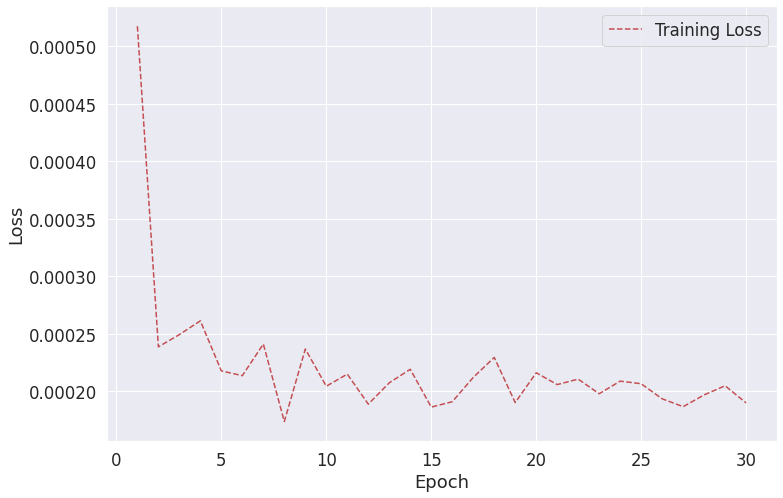

In [59]:
loss = history.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

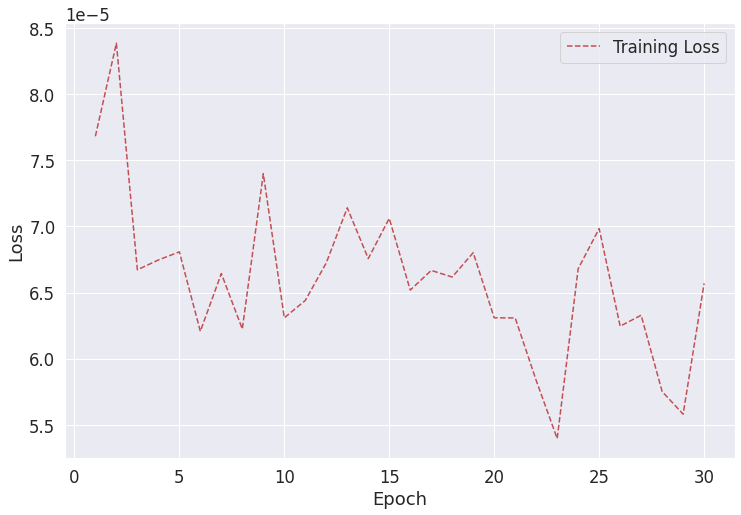

In [60]:
loss = history1.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

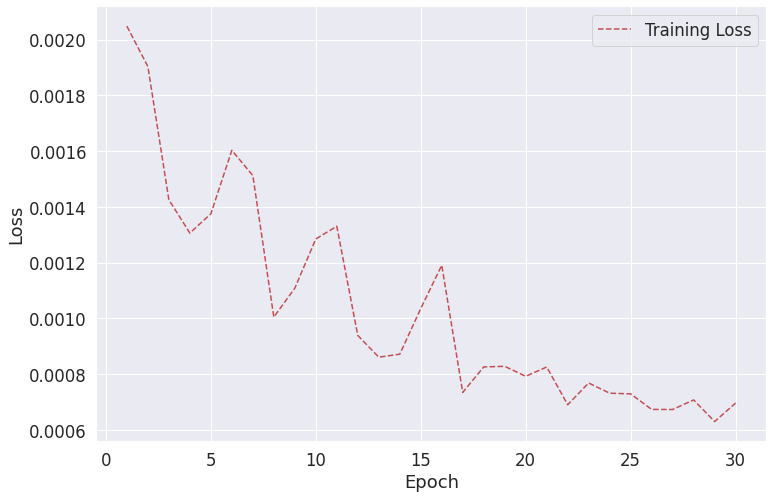

In [61]:
loss = history3.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

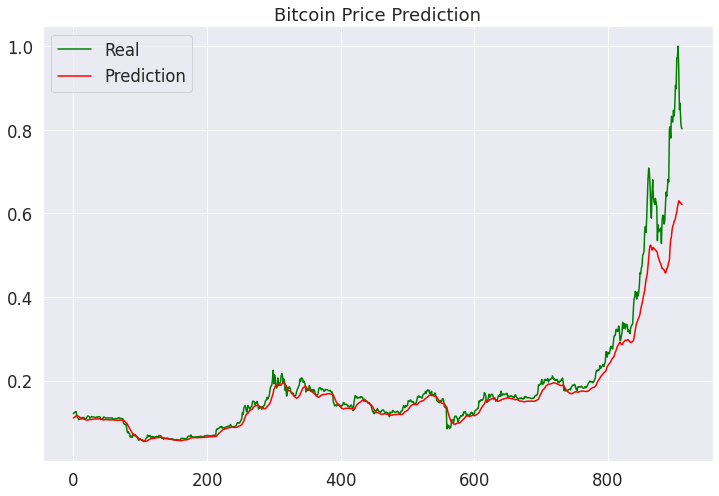

In [62]:
pred = model.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='green', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()

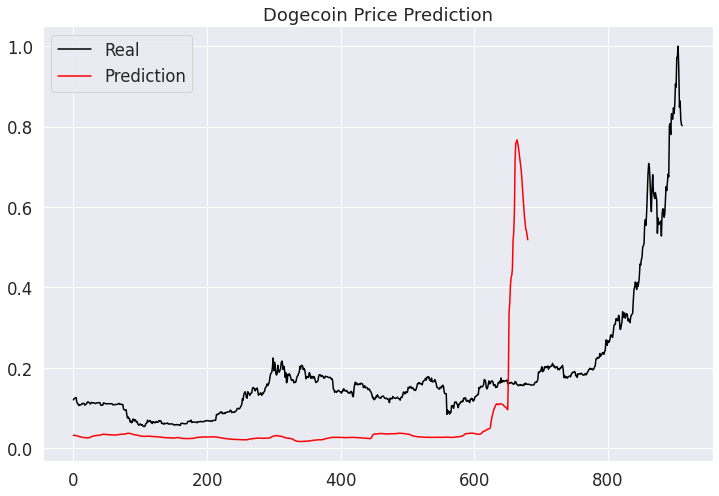

In [63]:
pred = model.predict(X_test1)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='black', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Dogecoin Price Prediction')
plt.legend()
plt.show()

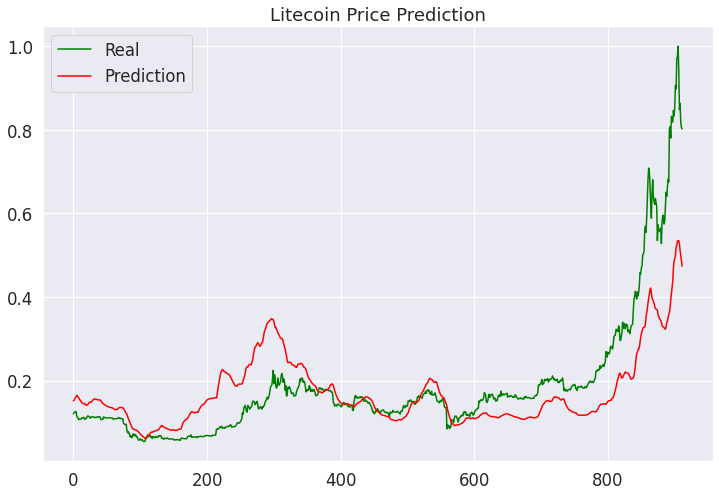

In [64]:
pred = model.predict(X_test3)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='green', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Litecoin Price Prediction')
plt.legend()
plt.show()